In [27]:
from sympy import *
import plotly.graph_objects as go
import numpy as np

**Ejemplo 1 (EXCENTRICIDAD VARIABLE)**

**Viga Postensada**

In [28]:
# Datos #
l=40 # ft Longitud de la viga
wd=500 # lb/ft Carga Muerta
wl=1000 # lb/ft Carga Viva

# Propiedades de los materiales (concreto y acero de presfuerzo)
fc=6000 # lb/in2
fc70=fc*70/100 # lb/in2
dc=150 # lb/ft3 Densidad del concreto
R=.85 # Adimensional # Razon de presfuerzo efectivo-inicial
print ('fc70=',round(fc70,2),'lb/in2')

fc70= 4200.0 lb/in2


**Solucion**

In [29]:
fci=-.6*fc70 # lb/in2 # Limite de Compresion inicial (Despues de la Transferencia del Presfuerzo) del acero de presfuerzo
fti=3*fc70**.5 # lb/in2 # Limite de Tension inicial (Despues de la Transferencia del Presfuerzo) del acero de presfuerzo
fcs=-.45*fc # lb/in2 # Limite de Compresion del concreto (Despues de aplicadas las cargas de servicio)
fts=6*fc**.5 # lb/in2 # Limite de Tension del concreto (Despues de aplicadas las cargas de servicio)
print ("fci:",round(fci,2),"lb/in2")
print ("fti:",round(fti,2),"lb/in2")
print ("fcs:",round(fcs,2),"lb/in2")
print ("fts:",round(fts,2),"lb/in2")

fci: -2520.0 lb/in2
fti: 194.42 lb/in2
fcs: -2700.0 lb/in2
fts: 464.76 lb/in2


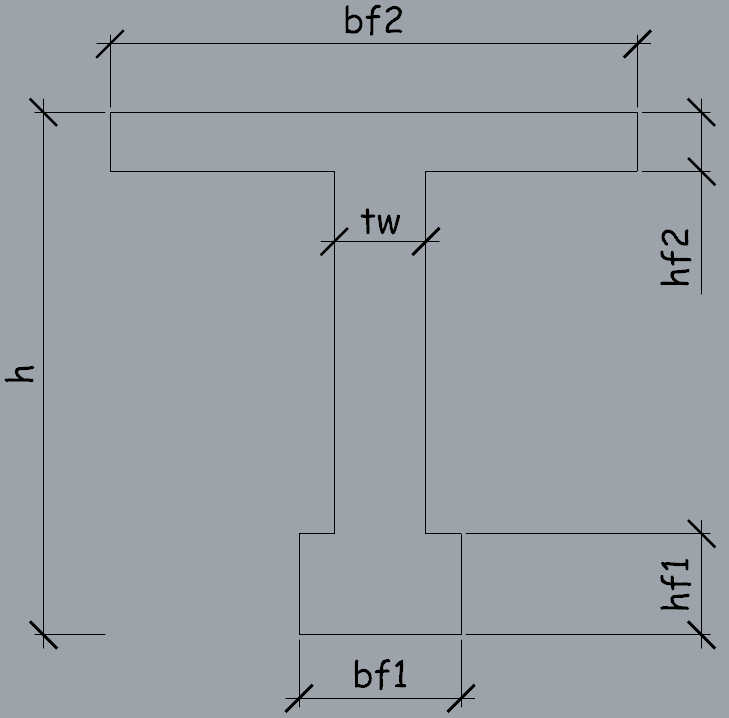

In [30]:
# Estimacion del peso de la viga

# Propiedades fisicas de la viga postensada
bf1=12 # in
bf2=12 # in
hf1=6 # in
hf2=6 # in
h=28 # in
tw=6 # in

# Determinacion de las propiedades de la seccion
Ac=hf1*bf1+hf2*bf2+tw*(h-(hf1+hf2)) # in2 Area de la seccion
cg=(hf1*bf1*hf1/2+tw*(h-(hf1+hf2))*((h-(hf1+hf2))/2+hf1)+hf2*bf2*(h-hf2/2))/Ac # in3 Centroide (*)
I=bf1*hf1**3/12+bf2*hf2**3/12+tw*(h-(hf1+hf2))**3/12+hf1*bf1*(cg-hf1/2)**2+hf2*bf2*(h-cg-hf2/2)**2+tw*(h-(hf1+hf2))*((h-(hf1+hf2))/2+hf1-cg)**2 # in4 # Inercia (*)
r=(I/Ac)**.5 # in Radio de giro (*)
s1=I/(h-cg) # in3 Modulo de seccion (*)
s2=I/cg # in3 Modulo de seccion (*)

# Salida de resultados
print ("Area de la seccion: ",round(Ac,2)," in2")
print ("Centroide: ",round(cg,2)," in")
print ("Inercia: ",round(I,2)," in4")
print ("Radio de giro: ",round(r,2)," in")
print ("Modulo de seccion 1: ",round(s1,2)," in3")
print ("Modulo de seccion 2: ",round(s2,2)," in3")

# Calculo de Momentos de Peso Propio, Carga Muerta y Carga Viva
print ('------------------------------------')
wo=(Ac/12**2)*dc # lb/ft Peso Propio de la viga
Mo=wo*l**2/8/1000 # klb-ft Momento del Peso Propio de la viga
Md=wd*l**2/8/1000 # klb-ft Momento de la Carga Muerta
Ml=wl*l**2/8/1000 # klb-ft Momento de la Carga Viva
print ("wo:",round(wo,2),"lb/ft")
print ("Mo:",round(Mo,2),"klb-ft")
print ("Md:",round(Md,2),"klb-ft")
print ("Ml:",round(Ml,2),"klb-ft")

Area de la seccion:  240  in2
Centroide:  14.0  in
Inercia:  19904.0  in4
Radio de giro:  9.11  in
Modulo de seccion 1:  1421.71  in3
Modulo de seccion 2:  1421.71  in3
------------------------------------
wo: 250.0 lb/ft
Mo: 50.0 klb-ft
Md: 100.0 klb-ft
Ml: 200.0 klb-ft


In [31]:
# Modulos de Seccion
s1eq=((1-R)*Mo+Md+Ml)*1000*12/(R*fti-fcs) # in3 Modulo de Seccion de Compresion
s2eq=((1-R)*Mo+Md+Ml)*1000*12/(fts-R*fci) # in3 Modulo de Seccion de Tension
print ("s1eq:",round(s1eq,2),"in3")
print ("s2eq:",round(s2eq,2),"in3")

# Comparamos los modulos de seccion con los calculados anteriormente
print ('------------------------------------')
dif1=s1eq-s1
dif2=s2eq-s2
print ("Diferencia en Modulo de Seccion 1: ",round(dif1,2)," in3")
print ("Diferencia en Modulo de Seccion 2: ",round(dif2,2)," in3")

s1eq: 1287.84 in3
s2eq: 1415.55 in3
------------------------------------
Diferencia en Modulo de Seccion 1:  -133.87  in3
Diferencia en Modulo de Seccion 2:  -6.16  in3


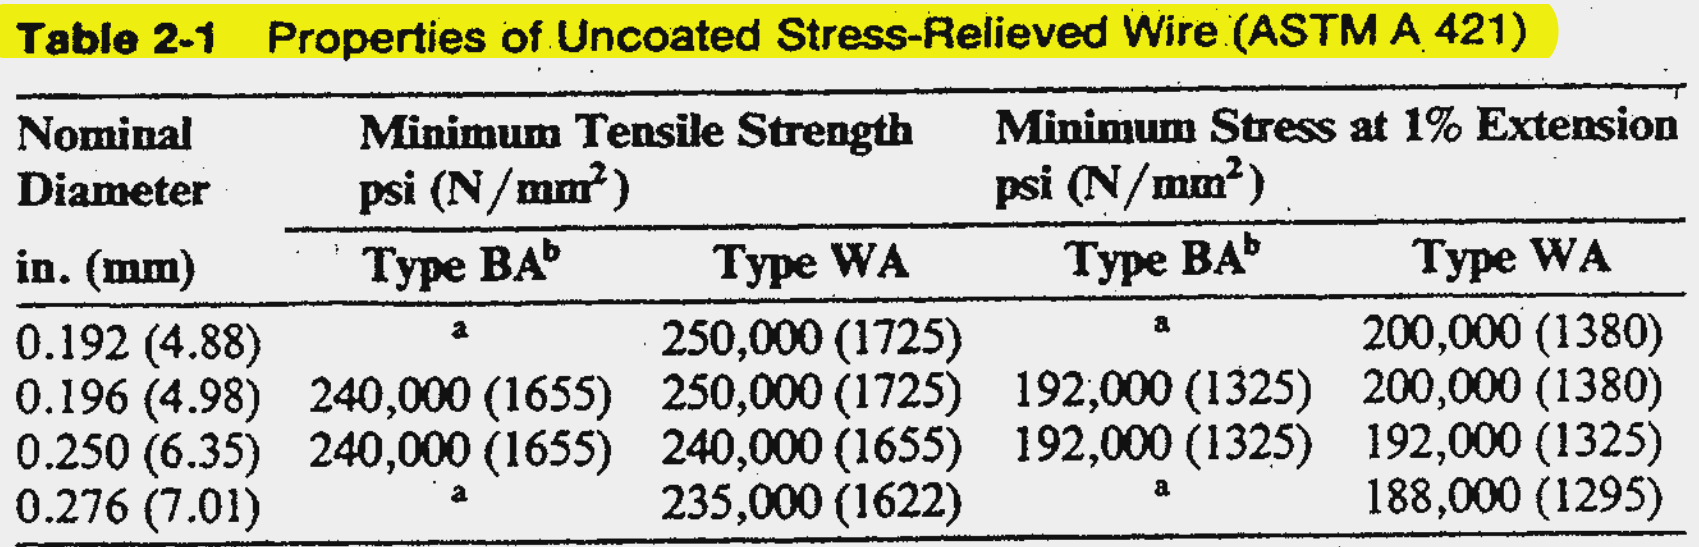

In [32]:
# Esfuerzos en el centroide
fcci=fti-(h-cg)/h*(fti-fci) # lb/in2 # Esfuerzo Compresion Inicial
Pi=Ac*abs(fcci)/1000 # klb # Fuerza Compresion Inicial
exr=(fti-fcci)*s2/(Pi*1000)+Mo*12*10**3/(Pi*1000) # in # Excentricidad Requerida
print ('fcci:',round(fcci,2),'lb/in2')
print ('Pi:',round(Pi,2),'klb')
print ('exr:',round(exr,2),'in')

fcci: -1162.79 lb/in2
Pi: 279.07 klb
exr: 9.06 in


In [33]:
# Acero de Presfuerzo

# Usaremos alambres de 1/4 in
fpmin=240 # ksi Resistencia minima a la tension del acero de presfuerzo
fpr=.7*fpmin # ksi Resistencia reducida a la tension del acero de presfuerzo
Ap=Pi/fpr # in2 Area del acero de presfuerzo
print ('Ap:',round(Ap,3),'in2')

print ('------------------------------------')

diam=.25 # in # Diametro del acero de refuerzo
num=1 # Numero de barras de acero de refuerzo
Ah=pi*diam**2/4*num # in2 # Area de acero de refuerzo
Nh=ceiling(Ap/Ah) # Numero de barras de acero de refuerzo
print ('Nh:',Nh,'barras de','diametro',diam,'in')
print ('Escoger n (Numero de Tendones)...')

Ap: 1.661 in2
------------------------------------
Nh: 34 barras de diametro 0.25 in
Escoger n (Numero de Tendones)...


In [34]:
n=2 # 2 Tendones de 17 alambres de 1/4 in
print ('n:',n,'Tendones')

n: 2 Tendones


In [35]:
# Pi
fpis=-Pi*1000/Ac*(1-exr*(h-cg)/r**2) # lb/in2 # Esfuerzo Superior Inicial
fpii=-Pi*1000/Ac*(1+exr*cg/r**2) # lb/in2 # Esfuerzo Inferior Inicial
# Pe
fpes=R*fpis # lb/in2 Esfuerzo Superior Efectivo
fpei=R*fpii # lb/in2 Esfuerzo Inferior Efectivo
# Mo
fpmos=-Mo*12*10**3/s1 # lb/in2 Esfuerzo Superior
fpmoi=Mo*12*10**3/s2 # lb/in2 Esfuerzo Inferior
# Md+Ml
fpmdmls=-(Md+Ml)*12*10**3/s1 # lb/in2 Esfuerzo Superior
fpmdmli=(Md+Ml)*12*10**3/s2 # lb/in2 Esfuerzo Inferior

# Resultados
print ('Pi')
print ('fpis:',round(fpis,2),'lb/in2')
print ('fpii:',round(fpii,2),'lb/in2')
print ('------------------------------------')
print ('Pe')
print ('fpes:',round(fpes,2),'lb/in2')
print ('fpei:',round(fpei,2),'lb/in2')
print ('------------------------------------')
print ('Mo')
print ('fpmos:',round(fpmos,2),'lb/in2')
print ('fpmoi:',round(fpmoi,2),'lb/in2')
print ('------------------------------------')
print ('Md + Ml')
print ('fpmdmls:',round(fpmdmls,2),'lb/in2')
print ('fpmdmli:',round(fpmdmli,2),'lb/in2')

Pi
fpis: 616.45 lb/in2
fpii: -2942.03 lb/in2
------------------------------------
Pe
fpes: 523.98 lb/in2
fpei: -2500.72 lb/in2
------------------------------------
Mo
fpmos: -422.03 lb/in2
fpmoi: 422.03 lb/in2
------------------------------------
Md + Ml
fpmdmls: -2532.15 lb/in2
fpmdmli: 2532.15 lb/in2


In [36]:
# Verificacion de limites
fs1=fpis+fpmos # lb/in2 # Esfuerzo Superior
fi1=fpii+fpmoi # lb/in2 # Esfuerzo Inferior
print ('fs1:',round(fs1,2),'lb/in2')
print ('fi1:',round(fi1,2),'lb/in2')

print ('------------------------------------')

fs2=fpes+fpmos+fpmdmls # lb/in2 # Esfuerzo Superior
fi2=fpei+fpmoi+fpmdmli # lb/in2 # Esfuerzo Inferior
print ('fs2:',round(fs2,2),'lb/in2')
print ('fi2:',round(fi2,2),'lb/in2')

fs1: 194.42 lb/in2
fi1: -2520.0 lb/in2
------------------------------------
fs2: -2430.2 lb/in2
fi2: 453.46 lb/in2


In [37]:
fig=go.Figure()
fig=fig.add_trace(go.Scatter(x=[fti,fci],y=[0,h],mode='markers+lines',name='Limite Inicial'))
fig=fig.add_trace(go.Scatter(x=[fts,fcs],y=[0,h],mode='markers+lines',name='Limite Final'))
fig=fig.add_trace(go.Scatter(x=[fi1,fs1],y=[0,h],mode='markers+lines',name='Esfuerzo Inicial'))
fig=fig.add_trace(go.Scatter(x=[fi2,fs2],y=[0,h],mode='markers+lines',name='Esfuerzo Final'))
fig.update_layout(xaxis=dict(autorange="reversed"))
#  Limite Inicial = Presfuerzo Inicial + Peso Propio
#  Limite Final = Presfuerzo Efectivo + Peso Propio + Carga Servicio
fig.show()

**Ejemplo 2 (EXCENTRICIDAD CONSTANTE)**

In [38]:
# Datos #
l=40 # ft Longitud de la viga
wd=500 # lb/ft Carga Muerta
wl=1000 # lb/ft Carga Viva

# Propiedades de los materiales (concreto y acero de presfuerzo)
fc=6000 # lb/in2
fc70=fc*70/100 # lb/in2
dc=150 # lb/ft3 Densidad del concreto
R=.85 # Adimensional # Razon de presfuerzo efectivo-inicial
print ('fc70=',round(fc70,2),'lb/in2')

fc70= 4200.0 lb/in2


**Solucion**

In [39]:
fci=-.6*fc70 # lb/in2 # Limite de Compresion inicial (Despues de la Transferencia del Presfuerzo) del acero de presfuerzo
fti=6*fc70**.5 # lb/in2 # Limite de Tension inicial (Despues de la Transferencia del Presfuerzo) del acero de presfuerzo
fcs=-.45*fc # lb/in2 # Limite de Compresion del concreto (Despues de aplicadas las cargas de servicio)
fts=6*fc**.5 # lb/in2 # Limite de Tension del concreto (Despues de aplicadas las cargas de servicio)
print ("fci:",round(fci,2),"lb/in2")
print ("fti:",round(fti,2),"lb/in2")
print ("fcs:",round(fcs,2),"lb/in2")
print ("fts:",round(fts,2),"lb/in2")

fci: -2520.0 lb/in2
fti: 388.84 lb/in2
fcs: -2700.0 lb/in2
fts: 464.76 lb/in2


In [40]:
# Estimacion del peso de la viga

# Propiedades fisicas de la viga postensada
bf1=12 # in
bf2=12 # in
hf1=6 # in
hf2=6 # in
h=30.5 # in
tw=6 # in

# Determinacion de las propiedades de la seccion
Ac=hf1*bf1+hf2*bf2+tw*(h-(hf1+hf2)) # in2 Area de la seccion
cg=(hf1*bf1*hf1/2+tw*(h-(hf1+hf2))*((h-(hf1+hf2))/2+hf1)+hf2*bf2*(h-hf2/2))/Ac # in3 Centroide (*)
I=bf1*hf1**3/12+bf2*hf2**3/12+tw*(h-(hf1+hf2))**3/12+hf1*bf1*(cg-hf1/2)**2+hf2*bf2*(h-cg-hf2/2)**2+tw*(h-(hf1+hf2))*((h-(hf1+hf2))/2+hf1-cg)**2 # in4 # Inercia (*)
r=(I/Ac)**.5 # in Radio de giro (*)
s1=I/(h-cg) # in3 Modulo de seccion (*)
s2=I/cg # in3 Modulo de seccion (*)
dp=4.936 # in Distancia del presfuerzo a la fibra inferior
ep=cg-dp # in Distancia del presfuerzo al centroide

# Salida de resultados
print ("Area de la seccion: ",round(Ac,2)," in2")
print ("Centroide: ",round(cg,2)," in")
print ("Inercia: ",round(I,2)," in4")
print ("Radio de giro: ",round(r,2)," in")
print ("Modulo de seccion 1: ",round(s1,2)," in3")
print ("Modulo de seccion 2: ",round(s2,2)," in3")

# Calculo de Momentos de Peso Propio, Carga Muerta y Carga Viva
print ('------------------------------------')
wo=(Ac/12**2)*dc # lb/ft Peso Propio de la viga
Mo=wo*l**2/8/1000 # klb-ft Momento del Peso Propio de la viga
Md=wd*l**2/8/1000 # klb-ft Momento de la Carga Muerta
Ml=wl*l**2/8/1000 # klb-ft Momento de la Carga Viva
print ("wo:",round(wo,2),"lb/ft")
print ("Mo:",round(Mo,2),"klb-ft")
print ("Md:",round(Md,2),"klb-ft")
print ("Ml:",round(Ml,2),"klb-ft")

Area de la seccion:  255.0  in2
Centroide:  15.25  in
Inercia:  25206.81  in4
Radio de giro:  9.94  in
Modulo de seccion 1:  1652.91  in3
Modulo de seccion 2:  1652.91  in3
------------------------------------
wo: 265.62 lb/ft
Mo: 53.12 klb-ft
Md: 100.0 klb-ft
Ml: 200.0 klb-ft


In [41]:
# Modulos de Seccion
s1eq=((1-R)*Mo+Md+Ml)*1000*12/(R*fti-fcs) # in3 Modulo de Seccion de Compresion
s2eq=((1-R)*Mo+Md+Ml)*1000*12/(fts-R*fci) # in3 Modulo de Seccion de Tension
print ("s1eq:",round(s1eq,2),"in3")
print ("s2eq:",round(s2eq,2),"in3")

# Comparamos los modulos de seccion con los calculados anteriormente
print ('------------------------------------')
dif1=s1eq-s1
dif2=s2eq-s2
print ("Diferencia en Modulo de Seccion 1: ",round(dif1,2)," in3")
print ("Diferencia en Modulo de Seccion 2: ",round(dif2,2)," in3")

s1eq: 1219.47 in3
s2eq: 1417.71 in3
------------------------------------
Diferencia en Modulo de Seccion 1:  -433.44  in3
Diferencia en Modulo de Seccion 2:  -235.2  in3


In [42]:
# Esfuerzos en el centroide
fcci=fti-(h-cg)/h*(fti-fci) # lb/in2 # Esfuerzo Compresion Inicial
Pi=Ac*abs(fcci)/1000 # klb # Fuerza Compresion Inicial
exr=(fti-fcci)*s2/(Pi*1000) # in # Excentricidad Requerida
print ('fcci:',round(fcci,2),'lb/in2')
print ('Pi:',round(Pi,2),'klb')
print ('exr:',round(exr,2),'in')

fcci: -1065.58 lb/in2
Pi: 271.72 klb
exr: 8.85 in


In [43]:
# Acero de Presfuerzo

# Usaremos alambres de 1/4 in
fpmin=240 # ksi Resistencia minima a la tension del acero de presfuerzo
fpr=.7*fpmin # ksi Resistencia reducida a la tension del acero de presfuerzo
Ap=Pi/fpr # in2 Area del acero de presfuerzo
print ('Ap:',round(Ap,3),'in2')

print ('------------------------------------')

diam=.25 # in # Diametro del acero de refuerzo
num=1 # Numero de barras de acero de refuerzo
Ah=pi*diam**2/4*num # in2 # Area de acero de refuerzo
Nh=ceiling(Ap/Ah) # Numero de barras de acero de refuerzo
print ('Nh:',Nh,'barras de','diametro',diam,'in')
print ('Escoger n (Numero de Tendones)...')

Ap: 1.617 in2
------------------------------------
Nh: 33 barras de diametro 0.25 in
Escoger n (Numero de Tendones)...


In [44]:
n=2 # 2 Tendones de 17 alambres de 1/4 in
print ('n:',n,'Tendones')

n: 2 Tendones


In [45]:
# Pi
fpis=-Pi*1000/Ac*(1-exr*(h-cg)/r**2) # lb/in2 # Esfuerzo Superior Inicial
fpii=-Pi*1000/Ac*(1+exr*cg/r**2) # lb/in2 # Esfuerzo Inferior Inicial
# Pe
fpes=R*fpis # lb/in2 Esfuerzo Superior Efectivo
fpei=R*fpii # lb/in2 Esfuerzo Inferior Efectivo
# Mo
fpmos=-Mo*12*10**3/s1 # lb/in2 Esfuerzo Superior
fpmoi=Mo*12*10**3/s2 # lb/in2 Esfuerzo Inferior
# Md+Ml
fpmdmls=-(Md+Ml)*12*10**3/s1 # lb/in2 Esfuerzo Superior
fpmdmli=(Md+Ml)*12*10**3/s2 # lb/in2 Esfuerzo Inferior

# Resultados
print ('Pi')
print ('fpis:',round(fpis,2),'lb/in2')
print ('fpii:',round(fpii,2),'lb/in2')
print ('------------------------------------')
print ('Pe')
print ('fpes:',round(fpes,2),'lb/in2')
print ('fpei:',round(fpei,2),'lb/in2')
print ('------------------------------------')
print ('Mo')
print ('fpmos:',round(fpmos,2),'lb/in2')
print ('fpmoi:',round(fpmoi,2),'lb/in2')
print ('------------------------------------')
print ('Md + Ml')
print ('fpmdmls:',round(fpmdmls,2),'lb/in2')
print ('fpmdmli:',round(fpmdmli,2),'lb/in2')

Pi
fpis: 388.84 lb/in2
fpii: -2520.0 lb/in2
------------------------------------
Pe
fpes: 330.52 lb/in2
fpei: -2142.0 lb/in2
------------------------------------
Mo
fpmos: -385.68 lb/in2
fpmoi: 385.68 lb/in2
------------------------------------
Md + Ml
fpmdmls: -2177.98 lb/in2
fpmdmli: 2177.98 lb/in2


In [46]:
# Verificacion de limites
fs1=fpis+fpmos # lb/in2 # Esfuerzo Superior
fi1=fpii+fpmoi # lb/in2 # Esfuerzo Inferior
print ('fs1:',round(fs1,2),'lb/in2')
print ('fi1:',round(fi1,2),'lb/in2')

print ('------------------------------------')

fs2=fpes+fpmos+fpmdmls # lb/in2 # Esfuerzo Superior
fi2=fpei+fpmoi+fpmdmli # lb/in2 # Esfuerzo Inferior
print ('fs2:',round(fs2,2),'lb/in2')
print ('fi2:',round(fi2,2),'lb/in2')

fs1: 3.16 lb/in2
fi1: -2134.32 lb/in2
------------------------------------
fs2: -2233.15 lb/in2
fi2: 421.67 lb/in2


In [47]:
fig=go.Figure()
fig=fig.add_trace(go.Scatter(x=[fti,fci],y=[0,h],mode='markers+lines',name='Limite Inicial'))
fig=fig.add_trace(go.Scatter(x=[fts,fcs],y=[0,h],mode='markers+lines',name='Limite Final'))
fig=fig.add_trace(go.Scatter(x=[fi1,fs1],y=[0,h],mode='markers+lines',name='Esfuerzo Inicial'))
fig=fig.add_trace(go.Scatter(x=[fi2,fs2],y=[0,h],mode='markers+lines',name='Esfuerzo Final'))
fig.update_layout(xaxis=dict(autorange="reversed"))
#  Limite Inicial = Presfuerzo Inicial + Peso Propio
#  Limite Final = Presfuerzo Efectivo + Peso Propio + Carga Servicio
fig.show()

**Ejemplo 3 (EXCENTRICIDAD VARIABLE)**

In [48]:
# Datos #
l=40 # ft Longitud de la viga
wd=500 # lb/ft Carga Muerta
wl=1000 # lb/ft Carga Viva

# Propiedades de los materiales (concreto y acero de presfuerzo)
fc=6000 # lb/in2
fc70=fc*70/100 # lb/in2
dc=150 # lb/ft3 Densidad del concreto
R=.85 # Adimensional # Razon de presfuerzo efectivo-inicial
print ('fc70=',round(fc70,2),'lb/in2')

fc70= 4200.0 lb/in2


**Solucion**

In [49]:
fci=-.6*fc70 # lb/in2 # Limite de Compresion inicial (Despues de la Transferencia del Presfuerzo) del acero de presfuerzo
fti=3*fc70**.5 # lb/in2 # Limite de Tension inicial (Despues de la Transferencia del Presfuerzo) del acero de presfuerzo
fcs=-.45*fc # lb/in2 # Limite de Compresion del concreto (Despues de aplicadas las cargas de servicio)
fts=6*fc**.5 # lb/in2 # Limite de Tension del concreto (Despues de aplicadas las cargas de servicio)
print ("fci:",round(fci,2),"lb/in2")
print ("fti:",round(fti,2),"lb/in2")
print ("fcs:",round(fcs,2),"lb/in2")
print ("fts:",round(fts,2),"lb/in2")

fci: -2520.0 lb/in2
fti: 194.42 lb/in2
fcs: -2700.0 lb/in2
fts: 464.76 lb/in2


In [50]:
Pi=279.069 # klb Fuerza Compresion Inicial :: Colocar
Pe=Pi*R # klb Fuerza Compresion Efectiva :: Colocar

# Propiedades fisicas de la viga postensada
bf1=12 # in
bf2=12 # in
hf1=6 # in
hf2=6 # in
h=28 # in
tw=6 # in

# Determinacion de las propiedades de la seccion
Ac=hf1*bf1+hf2*bf2+tw*(h-(hf1+hf2)) # in2 Area de la seccion
cg=(hf1*bf1*hf1/2+tw*(h-(hf1+hf2))*((h-(hf1+hf2))/2+hf1)+hf2*bf2*(h-hf2/2))/Ac # in3 Centroide (*)
I=bf1*hf1**3/12+bf2*hf2**3/12+tw*(h-(hf1+hf2))**3/12+hf1*bf1*(cg-hf1/2)**2+hf2*bf2*(h-cg-hf2/2)**2+tw*(h-(hf1+hf2))*((h-(hf1+hf2))/2+hf1-cg)**2 # in4 # Inercia (*)
r=(I/Ac)**.5 # in Radio de giro (*)
s1=I/(h-cg) # in3 Modulo de seccion (*)
s2=I/cg # in3 Modulo de seccion (*)

# Salida de resultados
print ("Area de la seccion: ",round(Ac,2)," in2")
print ("Centroide: ",round(cg,2)," in")
print ("Inercia: ",round(I,2)," in4")
print ("Radio de giro: ",round(r,2)," in")
print ("Modulo de seccion 1: ",round(s1,2)," in3")
print ("Modulo de seccion 2: ",round(s2,2)," in3")

# Calculo de Momentos de Peso Propio, Carga Muerta y Carga Viva
print ('------------------------------------')
wo=(Ac/12**2)*dc # lb/ft Peso Propio de la viga
wt=sum([wo,wd,wl]) # lb/ft Peso Total de la viga
Mo=wo*l**2/8/1000 # klb-ft Momento del Peso Propio de la viga
Md=wd*l**2/8/1000 # klb-ft Momento de la Carga Muerta
Ml=wl*l**2/8/1000 # klb-ft Momento de la Carga Viva
Mt=sum([Mo,Md,Ml]) # klb-ft Momento Total
print ("wo:",round(wo,2),"lb/ft")
print ("wt:",round(wt,2),"lb/ft")
print ("Mo:",round(Mo,2),"klb-ft")
print ("Md:",round(Md,2),"klb-ft")
print ("Ml:",round(Ml,2),"klb-ft")
print ('------------------------------------')
print ("Mt:",round(Mt,2),"klb-ft")

Area de la seccion:  240  in2
Centroide:  14.0  in
Inercia:  19904.0  in4
Radio de giro:  9.11  in
Modulo de seccion 1:  1421.71  in3
Modulo de seccion 2:  1421.71  in3
------------------------------------
wo: 250.0 lb/ft
wt: 1750.0 lb/ft
Mo: 50.0 klb-ft
Md: 100.0 klb-ft
Ml: 200.0 klb-ft
------------------------------------
Mt: 350.0 klb-ft


In [51]:
x=np.linspace(0,l,l+1)
Mo=-wo*x**2/2+wo*l/2*x
Mt=-wt*x**2/2+wt*l/2*x
fig=go.Figure() # Nuevo
fig=fig.add_trace(go.Scatter(x=x,y=Mo,mode='markers+lines',name='Mo'))
fig=fig.add_trace(go.Scatter(x=x,y=Mt,mode='markers+lines',name='Mt'))
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

In [52]:
x=np.linspace(0,l,l+1)
ex1=fti*s1/(Pi*1000)+s1/Ac+Mo*12/(Pi*1000)
ex2=-fci*s2/(Pi*1000)-s2/Ac+Mo*12/(Pi*1000)
ex4=-fts*s2/(Pe*1000)-s2/Ac+Mt*12/(Pe*1000)
ex3=fcs*s1/(Pe*1000)+s1/Ac+Mt*12/(Pe*1000)
fig=go.Figure() # Nuevo
fig=fig.add_trace(go.Scatter(x=x,y=ex,mode='markers+lines',name='fti'))
fig=fig.add_trace(go.Scatter(x=x,y=ex2,mode='markers+lines',name='fci(*)'))
fig=fig.add_trace(go.Scatter(x=x,y=ex4,mode='markers+lines',name='fts(*)'))
fig=fig.add_trace(go.Scatter(x=x,y=ex3,mode='markers+lines',name='fcs'))
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

NameError: name 'ex' is not defined

***Gracias mi Dios ! Amen ...***

**PRIMER EJERCICIO**

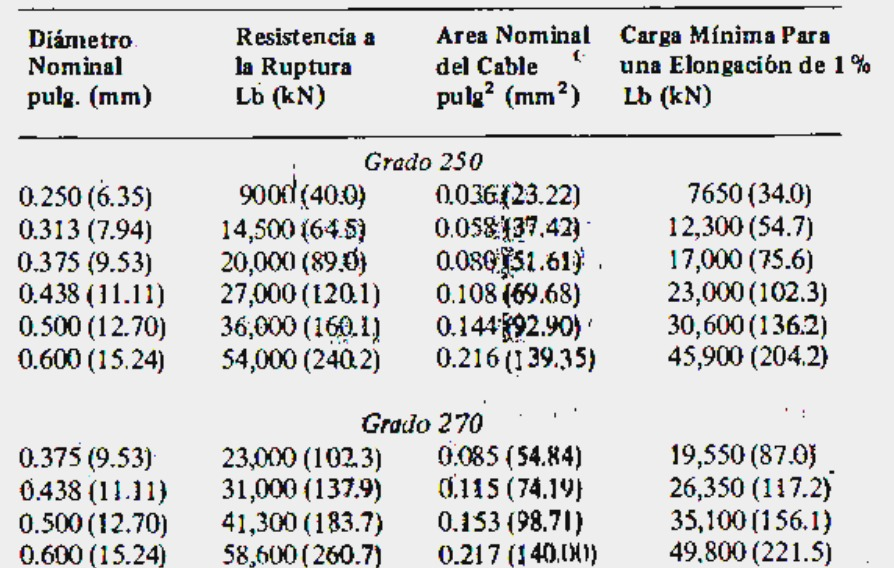

**Diseño a la flexion basado en el balanceo de cargas**

In [65]:
from sympy import *

# Propiedades Fisicas
def Inercia(base,altura):
    return base*altura**3/12
def radio_giro(inercia,area):
    return (inercia/area)**.5
def modulo_seccion(inercia,centroide):
    return inercia/centroide
def wo(area): # area (in2) , wo (lb/ft)
    return area/144*150

# Determinacion de los Presfuerzos
def presf_efec(w_bal,l,exc): # presf_efec(lb), w_bal(lb/ft), l (ft),  exc (in)
    return w_bal*l**2/(8*exc/12)
def presf_inic(presf_efec,R): # presf_inic (lb/in2) , presf_efec (lb/in2) ,R (adimensional : razon de presfuerzo efectivo-inicial)
    return presf_efec/R

# Estados de Carga
def f_bal(Pe,Ac): # f_bal (lb/in2) , Pe (lb) , Ac (in2)
    return -Pe/Ac
def M_nobal(kb,w_cs,l): # M_nobal (lb-ft) , kb (%) , w_cs (lb/ft) , l (ft)
    return kb*w_cs*l**2/8
def f_nobal(M_nobal,modulo_seccion): # f_nobal (lb/in2)
    return M_nobal*12/modulo_seccion
def sum(a,b):
    return a+b
def M_lr(kb,wl,l): # M_lr (lb-ft) , kb (%) , wl (lb/ft) , l (ft)
    return (1-kb)*wl*l**2/8
def f_lr(M_lr,modulo_seccion): # f_lr (lb/in2) , M_lr (lb-ft) , modulo_seccion (in3)
    return M_lr*12/modulo_seccion

# Estado de carga inicial
def Mo(wo,l): # Mo (lb-ft) , wo (lb/ft) , l (ft)
    return wo*l**2/8
def f1_Mo(Pi,Ac,y,c,r,Mo,s): # f_Mo (lb/in2) , Pi (lb) , Ac (in2) , y (in) , c (in) , r (in) , Mo (lb-ft) , s (in3)
    return -Pi/Ac*(1-y*c/r**2)-Mo*12/s
def f2_Mo(Pi,Ac,y,c,r,Mo,s): # f_Mo (lb/in2) , Pi (lb) , Ac (in2) , y (in) , c (in) , r (in) , Mo (lb-ft) , s (in3)
    return -Pi/Ac*(1+y*c/r**2)+Mo*12/s

# Esfuerzos permisibles
def fci(fcin): # fci (lb/in2) , fcin (lb/in2)
    return -fcin*.6
def fti(fcin): # fti (lb/in2) , fcin (lb/in2)
    return 3*fcin**.5
def fcs(fcin): # fcs (lb/in2) , fcin (lb/in2)
    return -fcin*.45
def fts(fcin): # fts (lb/in2) , fcin (lb/in2)
    return 6*fcin**.5

# Diseño del acero de presfuerzo
def fpy(fpu): # fpy (psi) , fpu (psi)
    return .85*fpu
def fpi(fpu): # fpi (psi) , fpu (psi)
    return .7*fpu
def Area_presf(Pi,fpi): # Area_presf (in2) , Pi (lb) , fpi (lb/in2)
    return Pi/fpi
def Nh(Ap,Ah): # Nh (adimensional) , Ap (in2) , Ah (in2)
    return ceiling(Ap/Ah)
def fpii(Pi,Ap): # fpii (lb/in2) , Pi (lb) , Ap (in2)
    return Pi/Ap
def fpe(Pe,Ap): # fpe (lb/in2) , Pe (lb) , Ap (in2)
    return Pe/Ap
def rho_p(Ap,b,h,rec): # rho_p (adimensional) , Ap (in2) , b (in) , h (in) , rec (in)
    return Ap/(b*(h-rec))
def fpss(fpu,rho_p,fc): # fpss (lb/in2) , fpu (psi) , rho_p (adimensional) , f_pu (psi) , fc (psi)
    return fpu*(1-.5*rho_p*fpu/fc) # fc a los 28 dias

# Resistencia del miembro (Mn)
def a(Ap,f_PS,fc,b): # a (in) , Ap (in2) , f_PS (lb/in2) , fc (lb/in2) , b (in)
    return Ap*f_PS/(.85*fc*b)
def Mn(Ap,f_PS,d,a): # Mn (lb-ft), Ap (in2) , f_PS (lb/in2) , d (in) , a (in)
    return .9*Ap*f_PS*(d-a/2)/12

# Factor de seguridad
def Md(wd,l): # Md (lb-ft) , wd (lb/ft) , l (ft)
    return wd*l**2/8
def Ml(wl,l): # Ml (lb-ft) , wl (lb/ft) , l (ft)
    return wl*l**2/8
def FS(phi_Mn,Mo,Md,Ml): # FS (adimensional) , phi_Mn (lb-ft) , Mo (lb-ft) , Md (lb-ft) , Ml (lb-ft)
    return (phi_Mn-1.4*(Mo+Md))/Ml

***Gracias mi Dios***

**2DO EJERCICIO**

In [55]:
# Calculo de Momentos
def Mu(Mo,Md,Ml): # Mu (lb-ft) , Mo (lb-ft) , Md (lb-ft) , Ml (lb-ft)
    return 1.4*(Mo+Md)+1.7*Ml
# Calculo del brazo interno
def brazo(h,rec,tf):
    return h-rec-tf/2
# Area tentativa del acero de presfuerzo
def Area_presf_Mn(Mn,fpu,brazo): # Area_presf_Mn (in2) , Mn (lb-ft) , fpu (psi), brazo (in)
    return Mn*12/(.9*fpu*brazo)
def Area_concr_Mn(Mn,fc_28,brazo): # Area_concr_Mn (in2) , Mn (lb-ft) , fc_28 (lb/in2) , brazo (in)
    return Mn*12/(.85*fc_28*brazo)
def a_bloque(A_concr_requ,b): # a (in) , A_concr_requ (in2) , b (in)
    return A_concr_requ/b
def nuevo_brazo(h,rec,a): # nuevo_brazo (in) , h (in) , rec (in) , a (in)
    return h-rec-a/2
# Calculo del esfuerzo en el acero por carga ultima
# Control del agrietamiento antes del postensado
def A_acero_conv(diam):  # A_acero_conv (in2) , diam (in)
    return 3.14*diam**2/4
# Esfuerzos Nominales
def f_pi1(Pi,Ac,exc,c1,r): # f_pi (lb/in2) , Pi (lb) , Ac (in2) , exc (in) , c1 (in) , r (in)
    return -Pi/Ac*(1-exc*c1/r**2)
def f_pi2(Pi,Ac,exc,c2,r): # f_pi (lb/in2) , Pi (lb) , Ac (in2) , exc (in) , c2 (in) , r (in)
    return -Pi/Ac*(1+exc*c2/r**2)
def f_pe1(R,fpi1): # f_pe (lb/in2) , R (adimensional) , fpi1 (lb/in2)
    return R*fpi1
def f_pe2(R,fpi2): # f_pe (lb/in2) , R (adimensional) , fpi2 (lb/in2)
    return R*fpi2
def f_mo1(Mo,s1): # f_mo (lb/in2) , Mo (lb-ft) , s1 (in3)
    return -Mo*12/s1
def f_mo2(Mo,s2): # f_mo (lb/in2) , Mo (lb-ft) , s2 (in3)
    return Mo*12/s2
def f_mdl1(Md,Ml,s1): # f_mdl (lb/in2) , Md (lb-ft) , Ml (lb-ft) , s1 (in3)
    return -(Md+Ml)*12/s1
def f_mdl2(Md,Ml,s2): # f_mdl (lb/in2) , Md (lb-ft) , Ml (lb-ft) , s2 (in3)
    return (Md+Ml)*12/s2
# Verificacion
def f_ci(fcin): # f_ci (lb/in2) , fcin (lb/in2)
    return -fcin*.6
def f_ti(fcin): # f_ti (lb/in2) , fcin (lb/in2)
    return 6*fcin**.5
def f_cs(fc_28): # f_cs (lb/in2) , fc_28 (lb/in2)
    return -fc_28*.45
def f_ts(fc_28): # f_ts (lb/in2) , fc_28 (lb/in2)
    return 12*fc_28**.5

**3ER EJERCICIO**

In [57]:
def modulo_seccion1_momentos(Mo,Md,Ml,R,fti,fcs):
    return (Mo+Md+Ml)/(R*fti-fcs)*12
def modulo_seccion2_momentos(Mo,Md,Ml,R,fci,fts):
    return (Mo+Md+Ml)/(fts-R*fci)*12
def fcci(fti,c,h,fci): # fcci (lb/in2) , fti (lb/in2) , c (in) , h (in) , fci (lb/in2)
    return fti-c/h*(fti-fci)
def Pi_fcci(Ac,fcci): # Pi (lb) , Ac (in2) , fcci (lb/in2)
    return Ac*abs(fcci)
def exc_fti_fcci(fti,fcci,s2,Pi): # exc_fti_fcci (in) , fti (lb/in2) , fcci (lb/in2) , s2 (in3) , Pi (lb)
    return (fti-fcci)*s2/Pi

***Gracias mi Dios !! Amen !! ...***

**EXAMEN**

In [126]:
Mo(wo(1872),135)
Md(1800,135)
Mu(Mo(wo(1872),135),Md(1000,135),Md(1800,135))/.9
Area_presf_Mn(18199687.5,250000,68)
Nh(14.27,.144)
Area_concr_Mn(18199687.5,6000,68)
fpss(250000,0.00222,6000)
Nh(3.74,A_acero_conv(3/4))*A_acero_conv(3/4)
f_pi2(2187118.62,1872,43.38,51.38,25.43)
f_pi1(2187118.62,1872,43.38,28.62,25.43)
f_pe1(.85,-5195.11)
f_pe2(.85,1074.69)
f_mo1(4442343.75,42293.05)
f_mo2(4442343.75,23558.33)
f_mdl1(2278125,4100625,42293.05)
f_mdl2(2278125,4100625,23558.33)
f_ci(0.7*9000)
f_ti(0.7*9000)
f_cs(9000)
f_ts(9000)

1138.4199576606165

In [82]:
(presf_efec(2950,135,43.38)/.85)/14.4

151883.237734928

In [95]:
A_acero_conv(3/4)
Inercia(90,8)+Inercia(8,72)*2

501504.0

In [93]:
Inercia(8,72)

248832.0

In [96]:
radio_giro(1210427.11,1872)

25.42824568110831